# Mod 4 Assessment Review
Agenda Today:
- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import seaborn as sns

/Users/judebuenaseda/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Part I. PCA

In [2]:
# Import the mpg dataset and build pca
mpg = sns.load_dataset('mpg')
# what are some of the steps to build pca?
mpg_features = mpg.iloc[:,:5]
# step 1 - standardize and scale
scaler = StandardScaler()
mpg_scaled = pd.DataFrame(scaler.fit_transform(mpg_features), columns=mpg_features.columns)
mpg_scaled.dropna(axis = 0, inplace = True)

In [3]:
# step 2 fit our pca
mpg_pca = PCA(n_components = .9)
mpg_pca.fit(mpg_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### What are some of the advantages and disadvantages of using PCA?

## Part II. Clustering

- Describe the algorithm of Hierchical Clustering 
- Describe the algorithm of [K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) Clustering 
    - step 1 -> randomly initialize k centroids
    - step 2 -> assign the membership of observations based on the closest distance to the centroids
    - step 3 -> calculate the mean distance between centroids and points, and move centroids to the center of all its members
    - step 4 -> reassign points, repeat step 3 until no changes occur


In [4]:
# building a k-means clustering model 
kmeans = KMeans(n_clusters = 3)
kmeans.fit(mpg_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# we can get the labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0,

In [6]:
# what are some of the ways to evaluate k-means?
#silhouette score measures the ratio how far away are the stuff
#calinski is the variance ratio

# how to select the best value of k using those metrics?
#elbow method 

## Part III. Natural Language Processing 
- What are some of the ways in which we can engineer features in NLP?
- What is TF-IDF, how is it calculated? What does it represent?

In [7]:
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df

,review
0,"6/10 Acting, not great but some good acting.<b..."
1,Devil Hunter gained notoriety for the fact tha...
2,`Stanley and Iris' is a heart warming film abo...
3,"This may not be a memorable classic, but it is..."


In [8]:
# what are some of the steps to engineer the features?

# stop words removal
stopwords = stopwords.words('english')
# what if you need to remove more stopwords than this collection?

# use tfidf 
vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words=stopwords)

## could you add some optional parameters to that?

vectorizer.fit_transform(df['review'])

<4x686 sparse matrix of type '<class 'numpy.float64'>'
	with 729 stored elements in Compressed Sparse Row format>

**Interpretation of TFIDF** 

What does a high value of TFIDF tell you about a certain word?

In [9]:
# what are the step by step process of doing text classification

# step 1 - train test split 

# step 2 - tokenizing, feature engineering etc etc

# step 3 - fit the model to the training set, test the model on the testing set

# step 4 - output prediction on testing set, compare true labels to predicted labels to get accuracy

## Part IV. Time Series

In [10]:
ts = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [11]:
ts.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [12]:
ts['date'] = pd.to_datetime(ts['Date'])

In [13]:
# covert the date to datetime 
ts.info()

# your code below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   object        
 1   Temp    3650 non-null   float64       
 2   date    3650 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [14]:
# set the index to date
ts.set_index('date', inplace = True)

In [15]:
# visualize the daily temperature 

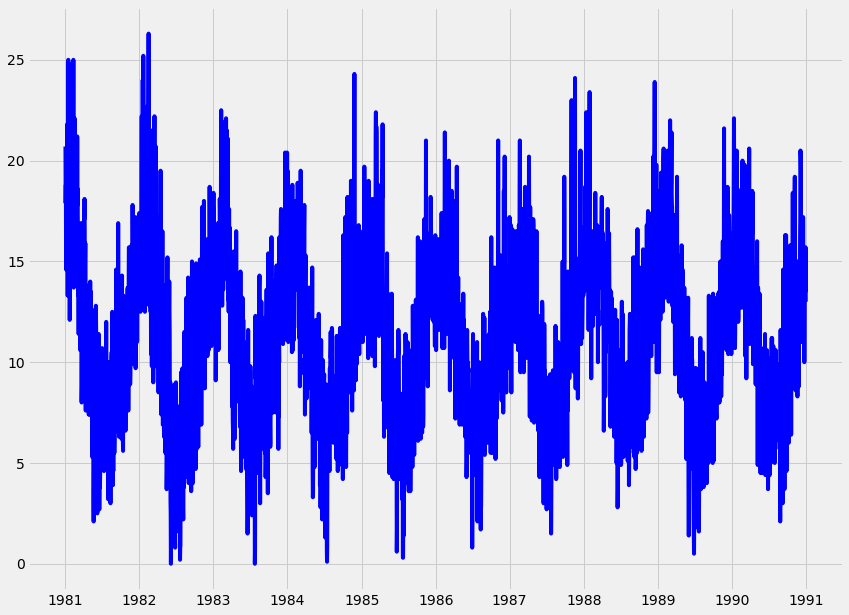

In [16]:
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(ts['Temp'], color='blue',label='Average monthly opening stock price')

In [17]:
# get only the monthly mean 
temp_monthly = ts.resample('M').mean()
temp_monthly

,Temp
date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


In [18]:
temp_monthly.rolling(window=3).mean()

,Temp
date,
1981-01-31,NaN
1981-02-28,NaN
1981-03-31,16.297158
1981-04-30,14.511746
1981-05-31,11.782330
...,...
1990-08-31,7.909892
1990-09-30,8.392115
1990-10-31,9.445878


In [19]:
## what are some of the assumptions of using arima model? 


# does our dataset satisfy this assumption?

# what kind of test can you use to find out?

In [20]:
# do a dickey fuller test to find out whether our dataset is stationary or not

from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(temp_monthly)

(-1.8923126029292825,
 0.33568610206498417,
 13,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 314.6487162773361)

In [24]:
temp_monthly = temp_monthly.diff(periods = 1)

In [26]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(temp_monthly[1:])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

(-4.62957636500997, 0.00011389116578306512, 12, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, 314.6084436365842)
Results of Dickey-Fuller test: 

Test Statistic                  -4.629576
p-value                          0.000114
#Lags Used                      12.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [27]:
# print ('Results of Dickey-Fuller test: \n')

# print(dfoutput)